### operations of one store 



In [79]:
selected_store='0bdfe714-89e5-49ea-8bbb-5ef3b02473df'

In [80]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt



In [81]:
# Import merchants
m_df=pd.read_csv('./data/MerchantInfos.csv', sep=',', index_col='Id')
m_df.head()

,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,SellsOfflineCards,StreetAddress,ZipCode,City,Country,CanGetBowl,CanPreorder,IsPublished,ShowInStats
Id,,,,,,,,,,,,,,,
83787f7a-b659-44b6-a8aa-d1ef5b958a65,ed2c2eea-8399-4779-a9ea-dafb77878965,SAP WDF49 - Food Factory,8.642271,49.292543,2021-06-28 11:56:10.812661,4,False,Dietmar-Hopp-Allee 17,69190,Walldorf,NaN,True,False,True,True
4cd61f39-ddce-449f-8d1a-ef95c7b25307,cc8b8b51-efd7-4d74-84c8-4721619867df,Guten Dag,13.413539,52.548254,2020-07-14 19:44:49.101383,2,False,Schönhauser Allee 120,10437,Berlin,DE,False,True,True,True
fa17e91f-cdfb-4912-81c9-92cd0b87328e,78ecc5a3-0ea0-4820-9fd2-637c95d73782,Gasthaus Brückenschänke,7.771990,49.943655,2021-01-20 10:25:12.831661,2,False,Staatsstraße 4,55442,Stromberg,NaN,True,False,True,True
7c376406-7a5b-4a6c-b22c-e7e02ae0080c,f9b37c73-3a67-47b3-82cd-cfd1d6fafd6a,Com A,13.422482,52.500293,2020-08-26 06:53:57.107271,2,False,Oranienstraße 191,10999,Berlin,NaN,True,False,True,True
f421a5f6-ba67-4336-afc3-021a04da5005,556becfc-1aac-43e2-87d9-cbc3fab0f4b0,BLE - Betriebsgastronomie,7.184823,50.672743,2020-10-01 09:33:59.032472,4,False,Deichmanns Aue 29,53179,Bonn,NaN,True,False,False,True


In [82]:
m_df.loc[selected_store,]

MerchantId           5c3fc650-3eed-42db-a94f-9cb5626a9429
Name                                      Foodclub Bistro
Longitude                                         6.43316
Latitude                                          51.3737
CreationDate                   2021-03-19 13:51:02.275901
CategoryId                                              2
SellsOfflineCards                                   False
StreetAddress                        Industriering Ost 72
ZipCode                                             47906
City                                               Kempen
Country                                                DE
CanGetBowl                                           True
CanPreorder                                          True
IsPublished                                          True
ShowInStats                                          True
Name: 0bdfe714-89e5-49ea-8bbb-5ef3b02473df, dtype: object

In [83]:
out_df=pd.read_csv('./data/Total Checkout.csv', sep=',', low_memory=False)
out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince'])
out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill'])

out_df=out_df.drop(['Unnamed: 0'], axis=1)
store_out=out_df[out_df['StoreId']==selected_store].copy()
del out_df
store_out.head()

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
891118,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2681045,37799494-f7d3-4aae-9049-e3dbce0bb887,2021-06-09 10:03:54.999022+00:00,2021-06-24 17:35:51.617026+00:00,9817c77e-10f2-488d-bf0e-7295add43d28,NaN,1250ml Bowl
891119,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2807980,9acdcce6-b252-4671-882b-339aacda695f,2021-06-16 16:40:20.343219+00:00,2021-06-24 17:35:51.617026+00:00,89e03e68-0f3d-465e-9de2-71aa92526c06,NaN,1250ml Bowl
948454,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2807999,NaN,2021-06-16 16:41:49.751712+00:00,2021-06-16 16:41:49.751712+00:00,47cb615a-80af-460b-b329-052d92b71193,NaN,1250ml Bowl
979636,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2739304,NaN,2021-06-11 16:27:00.194078+00:00,2021-06-11 16:27:00.194078+00:00,e315f99c-76c4-44d0-ae4a-dc5a1c940569,NaN,1250ml Bowl
979637,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2726488,5ac9a29e-eb5f-4ec3-8b2c-3c0b5919956f,2021-06-11 10:01:31.221188+00:00,2021-06-11 16:27:00.194078+00:00,1569cbf5-8441-4956-981b-b0fd05c4b04d,NaN,1250ml Bowl


In [84]:
# import transactions
in_df=pd.read_csv('./data/Total Checkins.csv', sep=',', low_memory=False)

#in_df.info()

in_df['OwnerSince']= pd.to_datetime(in_df['OwnerSince'])
in_df['OwnerTill']= pd.to_datetime(in_df['OwnerTill'])

#print(in_df.info())
in_df=in_df.drop(['Unnamed: 0'], axis=1)
store_in=in_df[in_df['StoreId']==selected_store].copy()
del in_df
store_in.head()

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
42183,013592a2-5083-4e31-9dc9-86c5594202a5,vytal_25Qh56K3tv5GPj,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3703071,c282985a-f6b3-48ae-be0a-749f750f21f2,2021-08-23 17:18:48.678963+00:00,2021-08-30 15:37:31.615444+00:00,34cf809d-8210-4311-942a-47aa3942d514,1250ml Bowl
68851,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3668841,cb16df59-b656-4258-95ba-74a98ee98453,2021-08-19 18:11:08.947727+00:00,2021-08-25 11:41:55.909273+00:00,2be3838f-00fb-4bda-b9a0-1a3933ca5522,1250ml Bowl
68864,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3632724,78f8b972-5615-4885-866a-63710bacb852,2021-08-17 17:39:54.199847+00:00,2021-08-25 11:41:34.573849+00:00,2c3fc82a-f8fa-4c05-a2af-a504fc45682d,1250ml Bowl
68865,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3632722,78f8b972-5615-4885-866a-63710bacb852,2021-08-17 17:39:54.199847+00:00,2021-08-25 11:41:34.573849+00:00,860e6334-cdee-476e-a863-915744d3e0aa,1250ml Bowl
68866,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3632723,78f8b972-5615-4885-866a-63710bacb852,2021-08-17 17:39:54.199847+00:00,2021-08-25 11:41:34.573849+00:00,6df0ba41-2615-420a-80f3-6ad6aaf44ae5,1250ml Bowl


## Stock levels at each period.
For the sake of simplicity, I define the perios as months. 

(array([20., 17., 16., 19.,  4.,  0.,  6., 13.,  0.,  2.]),
 array([1.84698598e-01, 4.25531043e+01, 8.49215100e+01, 1.27289916e+02,
        1.69658321e+02, 2.12026727e+02, 2.54395133e+02, 2.96763538e+02,
        3.39131944e+02, 3.81500350e+02, 4.23868756e+02]),
 <BarContainer object of 10 artists>)

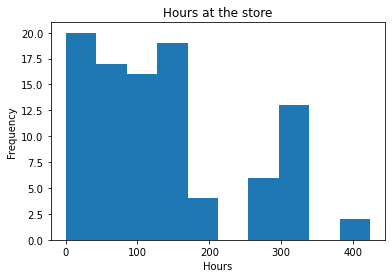

In [85]:
# plt how long containers stay in the restaurant 
plt.title('Hours at the store')
plt.ylabel('Frequency')
plt.xlabel('Hours')
plt.hist((store_in['OwnerTill']-store_in['OwnerSince']).dt.total_seconds()/3600) # convert to hours

(array([66.,  7., 11.,  5.,  2.,  1.,  0.,  1.,  0.,  2.]),
 array([   0.        ,  170.43392122,  340.86784244,  511.30176366,
         681.73568488,  852.1696061 , 1022.60352732, 1193.03744854,
        1363.47136976, 1533.90529098, 1704.3392122 ]),
 <BarContainer object of 10 artists>)

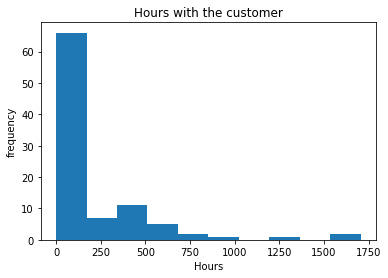

In [86]:
# plt how long containers stay with customer 
plt.title('Hours with the customer')
plt.ylabel('frequency')
plt.xlabel('Hours')
plt.hist((store_out['OwnerTill']-store_out['OwnerSince']).dt.total_seconds()/3600) # convert to hours



In [87]:
store_out.groupby(by='TransactionId').size().sort_values(ascending=False)

TransactionId
955ca539-ae1e-41e2-8d28-b2b5deaf655f    5
37799494-f7d3-4aae-9049-e3dbce0bb887    4
e40efb99-9285-4817-887c-9d9f0189dec4    3
d4763e2a-dbbc-4190-a202-0606ea7b367d    3
77f95489-1f33-4978-8f08-b3a3a4c9f719    3
e8908509-ba57-4283-a1ae-e9911dd69ae2    3
ebe69554-01cc-4dde-bcab-b1b9eea931e7    2
18816e7d-8473-49e7-af11-576fd7d76ae9    2
4239845f-2a0c-4350-8988-cf97fe91fdaf    2
447e4abb-7543-45cc-9f74-fcfa38e7d0b1    2
649a98ec-0b5f-4d4c-b30a-44c7e3dea888    2
8acef47f-61aa-4066-a64b-1f93c7c993cf    2
8051bc11-f6cc-4b4c-951a-d6ddf76262b5    2
9acdcce6-b252-4671-882b-339aacda695f    2
a09ba758-b570-4d24-9823-5e95857d9419    2
c00ac2cc-4eab-4520-823a-6261353731fb    2
96506b30-aa4c-4149-8528-860b3bc7d781    1
bb9496ef-c61c-4327-a49d-04998816fd11    1
db9c76c0-c019-471a-98cf-4ef3d179034b    1
1b678757-c771-4a9e-b818-3f23698a2f30    1
1c23e0c2-db2a-4bd1-a349-e1321f2aadc2    1
2012addc-cf2d-4ef1-a0b8-f49d5c65e612    1
20daba4b-88bd-435d-ac3f-f38487f0d86f    1
b5736970-d2af-4361-9

In [88]:
store_out.shape

(95, 11)

In [89]:
store_out.tail(1)

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
1694799,ac76c102-d8f4-422f-aa92-fefaa8329717,vytal_NrfwOmi7EY4dKl,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3039267,NaN,2021-07-02 09:10:54.334960+00:00,2021-07-02 09:10:54.334960+00:00,f64e8115-7d10-4804-bac4-46938744e03e,NaN,1250ml Bowl


In [90]:
store_out.head(1)

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
891118,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2681045,37799494-f7d3-4aae-9049-e3dbce0bb887,2021-06-09 10:03:54.999022+00:00,2021-06-24 17:35:51.617026+00:00,9817c77e-10f2-488d-bf0e-7295add43d28,NaN,1250ml Bowl


In [91]:
store_in.head(1)

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
42183,013592a2-5083-4e31-9dc9-86c5594202a5,vytal_25Qh56K3tv5GPj,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3703071,c282985a-f6b3-48ae-be0a-749f750f21f2,2021-08-23 17:18:48.678963+00:00,2021-08-30 15:37:31.615444+00:00,34cf809d-8210-4311-942a-47aa3942d514,1250ml Bowl


In [92]:
store_in.tail(1)

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
799381,ac76c102-d8f4-422f-aa92-fefaa8329717,vytal_NrfwOmi7EY4dKl,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2101158,0ce55949-516c-4452-a5a1-1a2c5864f818,2021-05-06 10:01:47.192455+00:00,2021-05-07 10:24:00.877337+00:00,89e03e68-0f3d-465e-9de2-71aa92526c06,1250ml Bowl


In [93]:

# Why does one transaction have multiple users?

store_out[store_out['TransactionId']=='955ca539-ae1e-41e2-8d28-b2b5deaf655f']

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
1512238,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3282143,955ca539-ae1e-41e2-8d28-b2b5deaf655f,2021-07-20 17:04:45.293643+00:00,2021-08-02 17:25:16.054647+00:00,90472c50-7980-4708-b667-b9c91d8724ce,NaN,1250ml Bowl
1512239,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3282142,955ca539-ae1e-41e2-8d28-b2b5deaf655f,2021-07-20 17:04:45.293643+00:00,2021-08-02 17:25:16.054647+00:00,95655b9b-b829-412b-99ef-2bf9c831f5e9,NaN,1250ml Bowl
1512240,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3282144,955ca539-ae1e-41e2-8d28-b2b5deaf655f,2021-07-20 17:04:45.293643+00:00,2021-08-02 17:25:16.054647+00:00,69f88a5d-d5c2-44d6-ab8b-d13c6066c272,NaN,1250ml Bowl
1552092,013592a2-5083-4e31-9dc9-86c5594202a5,vytal_25Qh56K3tv5GPj,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3282141,955ca539-ae1e-41e2-8d28-b2b5deaf655f,2021-07-20 17:04:45.293643+00:00,2021-07-26 17:23:52.150481+00:00,2be3838f-00fb-4bda-b9a0-1a3933ca5522,NaN,1250ml Bowl
1552093,013592a2-5083-4e31-9dc9-86c5594202a5,vytal_25Qh56K3tv5GPj,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3282140,955ca539-ae1e-41e2-8d28-b2b5deaf655f,2021-07-20 17:04:45.293643+00:00,2021-07-26 17:23:52.150481+00:00,89e03e68-0f3d-465e-9de2-71aa92526c06,NaN,1250ml Bowl


In [94]:
# Journey of a container
store_out[store_out['ContainerId']=='90472c50-7980-4708-b667-b9c91d8724ce']

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
1111678,ac76c102-d8f4-422f-aa92-fefaa8329717,vytal_NrfwOmi7EY4dKl,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2444647,NaN,2021-05-26 09:53:55.415851+00:00,2021-05-26 09:53:55.415851+00:00,90472c50-7980-4708-b667-b9c91d8724ce,NaN,1250ml Bowl
1512238,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3282143,955ca539-ae1e-41e2-8d28-b2b5deaf655f,2021-07-20 17:04:45.293643+00:00,2021-08-02 17:25:16.054647+00:00,90472c50-7980-4708-b667-b9c91d8724ce,NaN,1250ml Bowl
1609247,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3171930,649a98ec-0b5f-4d4c-b30a-44c7e3dea888,2021-07-12 17:21:35.436488+00:00,2021-07-15 17:30:42.387306+00:00,90472c50-7980-4708-b667-b9c91d8724ce,NaN,1250ml Bowl
1669178,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2681046,37799494-f7d3-4aae-9049-e3dbce0bb887,2021-06-09 10:03:54.999022+00:00,2021-07-06 18:29:28.773320+00:00,90472c50-7980-4708-b667-b9c91d8724ce,NaN,1250ml Bowl


In [95]:
# journey of a container
store_in[store_in['ContainerId']=='90472c50-7980-4708-b667-b9c91d8724ce']

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
175033,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3444878,37c1ef25-62fc-495c-bd31-7b9cd2cbe8d7,2021-08-02 17:25:16.054647+00:00,2021-08-05 18:15:27.346141+00:00,90472c50-7980-4708-b667-b9c91d8724ce,1250ml Bowl
271603,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3228071,5267dde5-4bc7-4cde-843b-99ca2b003cbc,2021-07-15 17:30:42.387306+00:00,2021-07-20 17:04:45.293643+00:00,90472c50-7980-4708-b667-b9c91d8724ce,1250ml Bowl
322439,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3095707,1c49bbb6-2217-4838-8205-3da86e1c300f,2021-07-06 18:29:28.773320+00:00,2021-07-12 17:21:35.436488+00:00,90472c50-7980-4708-b667-b9c91d8724ce,1250ml Bowl
547372,ac76c102-d8f4-422f-aa92-fefaa8329717,vytal_NrfwOmi7EY4dKl,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,2444648,47e73140-3223-429b-be7d-34bbdf06e6eb,2021-05-26 09:53:55.415851+00:00,2021-06-09 10:03:54.999022+00:00,90472c50-7980-4708-b667-b9c91d8724ce,1250ml Bowl


In [112]:
store_out.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False).head(10)

TransactionId
77f95489-1f33-4978-8f08-b3a3a4c9f719    3
d4763e2a-dbbc-4190-a202-0606ea7b367d    3
9acdcce6-b252-4671-882b-339aacda695f    2
e8908509-ba57-4283-a1ae-e9911dd69ae2    2
955ca539-ae1e-41e2-8d28-b2b5deaf655f    2
447e4abb-7543-45cc-9f74-fcfa38e7d0b1    2
ebe69554-01cc-4dde-bcab-b1b9eea931e7    1
5708dc05-9b9b-4816-b28d-da0d80bec29e    1
4feec0db-547c-44a6-a764-ddb88e47025c    1
4239845f-2a0c-4350-8988-cf97fe91fdaf    1
Name: UserId, dtype: int64

In [111]:
store_in.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False).head(6)

TransactionId
e84bd5e0-3a51-4f58-aff1-3c565c1dfabd    1
5267dde5-4bc7-4cde-843b-99ca2b003cbc    1
7a09f705-19b9-47a3-b8a1-4147e4b5e75c    1
78f8b972-5615-4885-866a-63710bacb852    1
77e9164e-a2c0-4d6f-8ad9-10d3b0afbe82    1
75346f12-cf0c-4c13-aaae-90965c95295d    1
Name: UserId, dtype: int64

In [114]:
store_out[store_out['TransactionId']=='e8908509-ba57-4283-a1ae-e9911dd69ae2']

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
1584438,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3228019,e8908509-ba57-4283-a1ae-e9911dd69ae2,2021-07-15 17:26:12.644492+00:00,2021-07-20 17:13:08.403949+00:00,e4310bdc-0152-416c-b4c1-19774c799f83,NaN,1250ml Bowl
1584439,0fd8dfbb-c8dd-4802-b5b1-82b705fb46c5,vytal_CgxIHX8m2bsT82,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3228018,e8908509-ba57-4283-a1ae-e9911dd69ae2,2021-07-15 17:26:12.644492+00:00,2021-07-20 17:13:08.403949+00:00,9817c77e-10f2-488d-bf0e-7295add43d28,NaN,1250ml Bowl
1592791,013592a2-5083-4e31-9dc9-86c5594202a5,vytal_25Qh56K3tv5GPj,0bdfe714-89e5-49ea-8bbb-5ef3b02473df,Foodclub Bistro,3228017,e8908509-ba57-4283-a1ae-e9911dd69ae2,2021-07-15 17:26:12.644492+00:00,2021-07-19 17:28:03.414737+00:00,47cb615a-80af-460b-b329-052d92b71193,NaN,1250ml Bowl


In [108]:
store_out['OwnerSince'].min()

Timestamp('2021-04-01 09:28:37.813834+0000', tz='UTC')